# Scripting II

- Para rodar mensalmente via cmd

2019-03
2019-04
2019-05
2019-06
2019-07


C:\Users\Artur\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


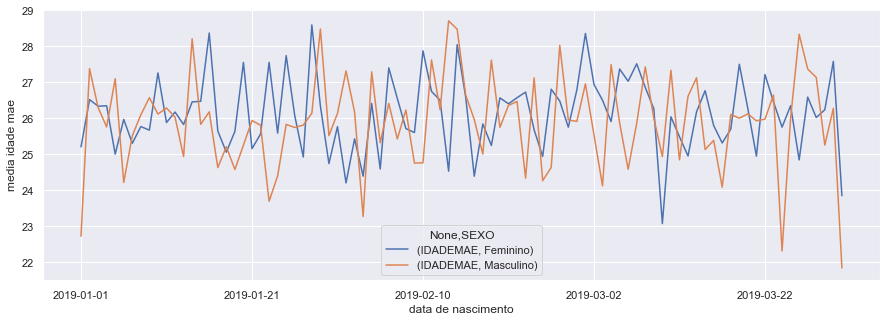

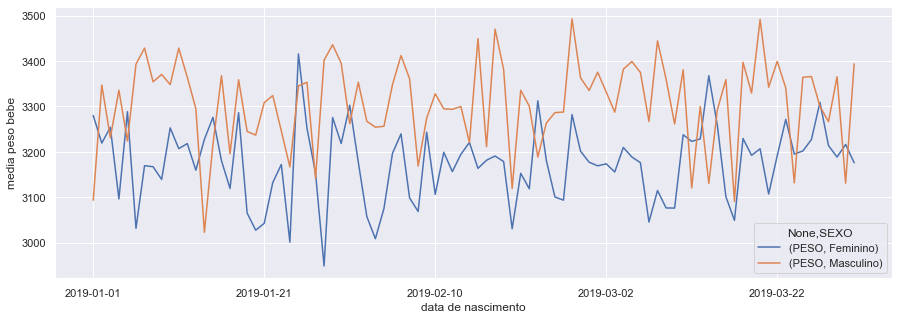

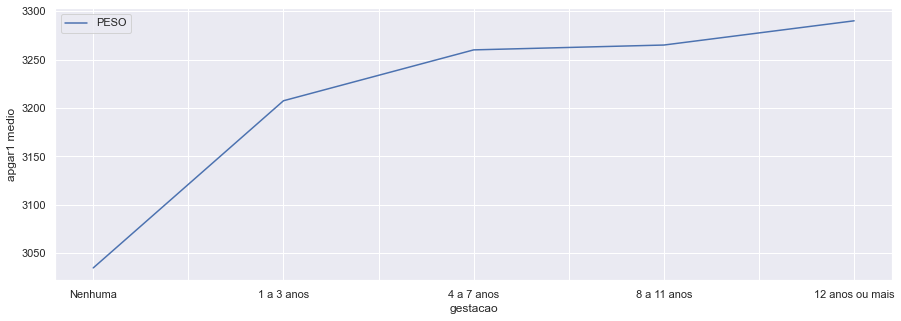

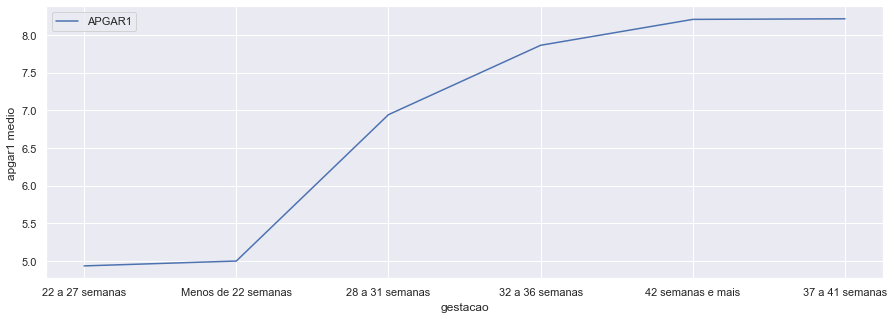

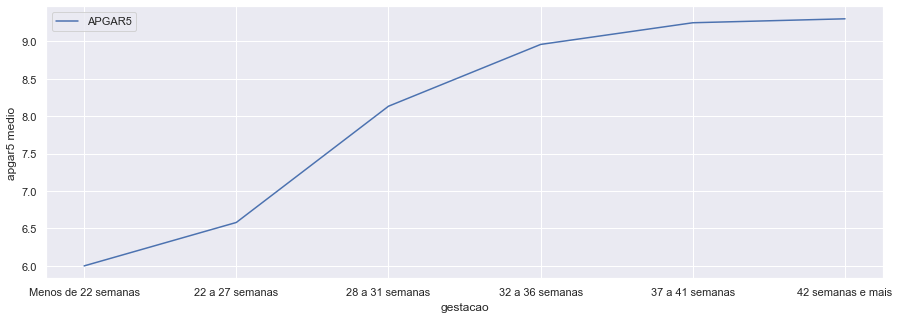

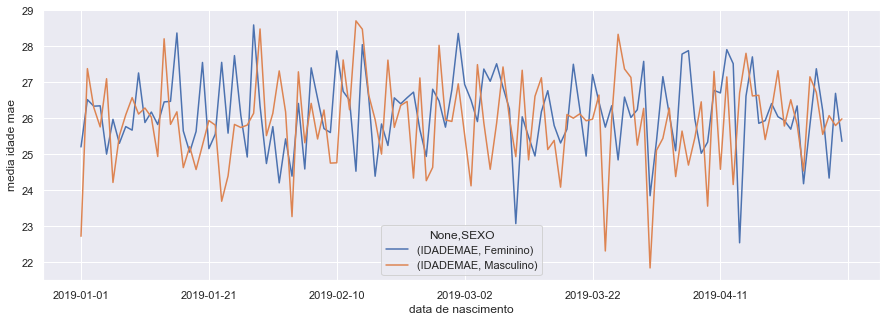

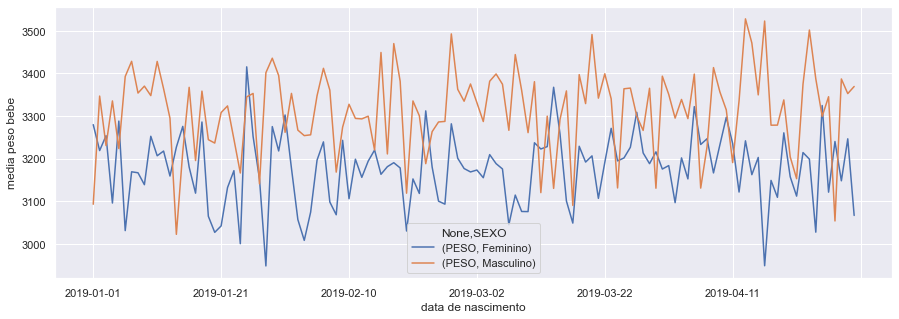

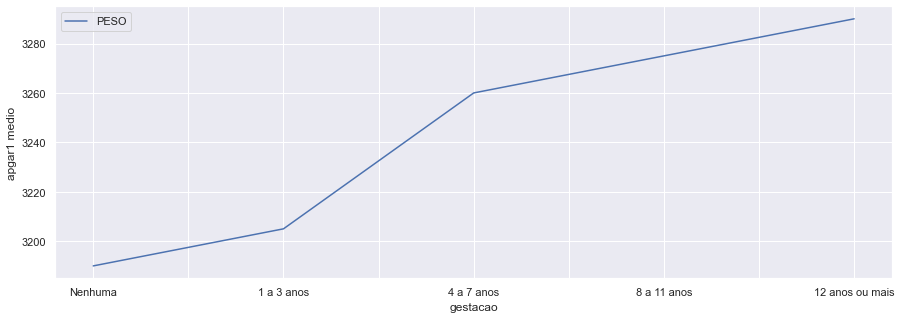

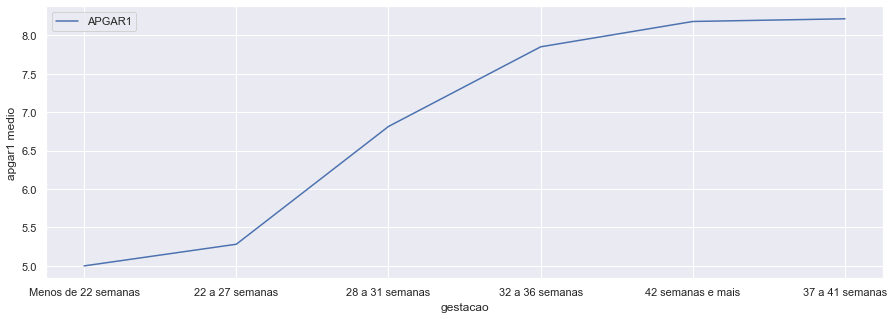

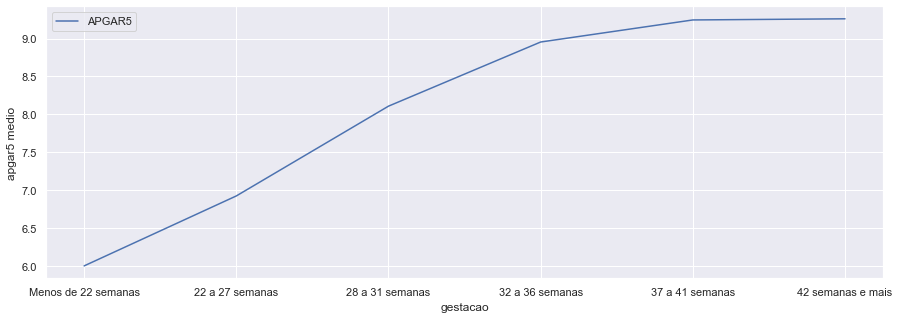

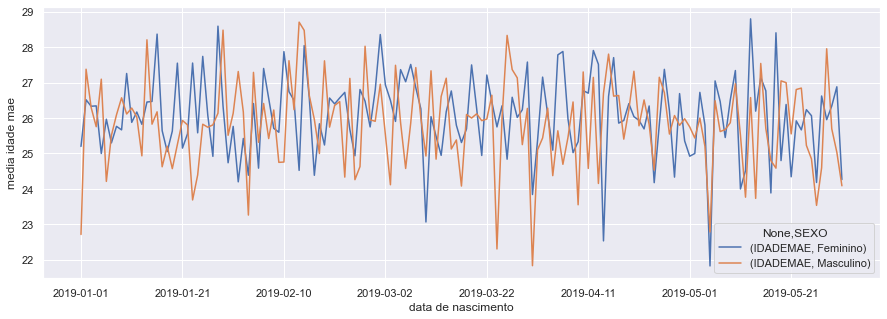

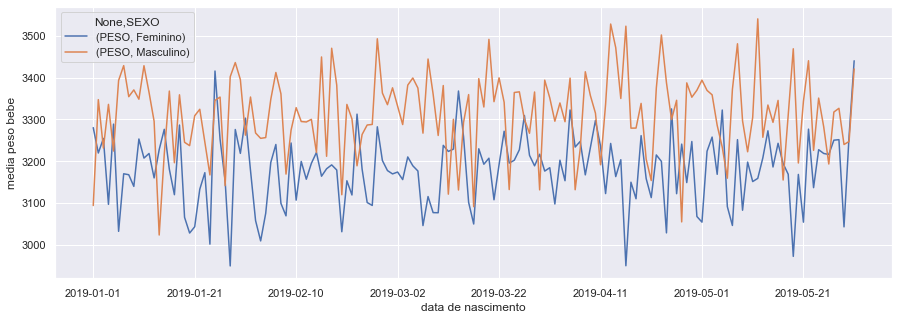

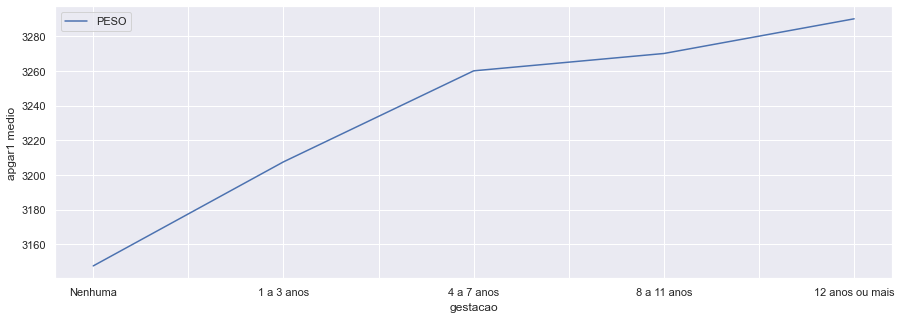

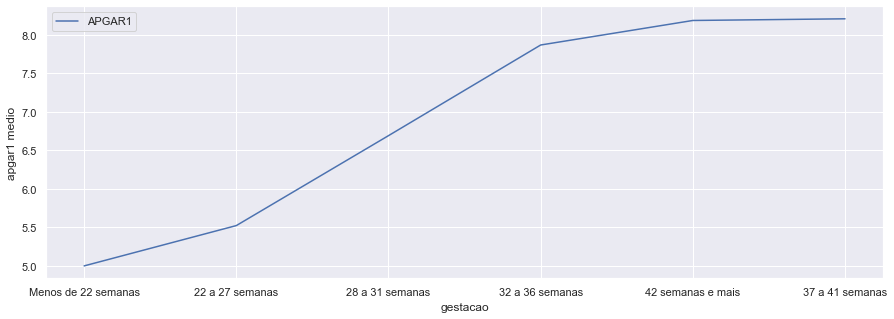

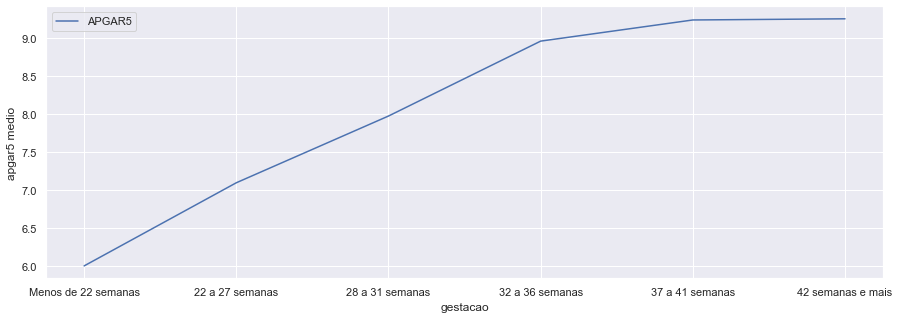

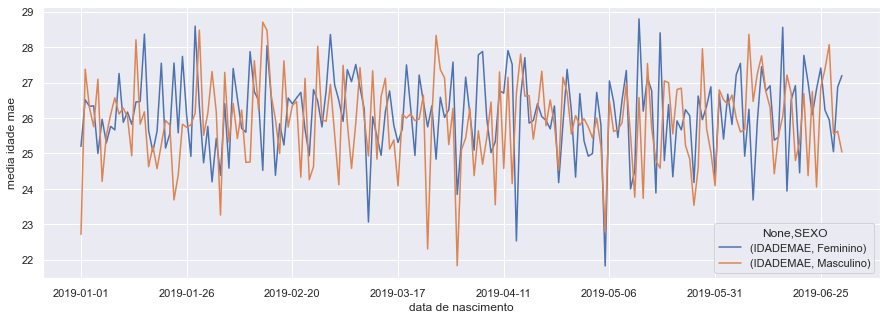

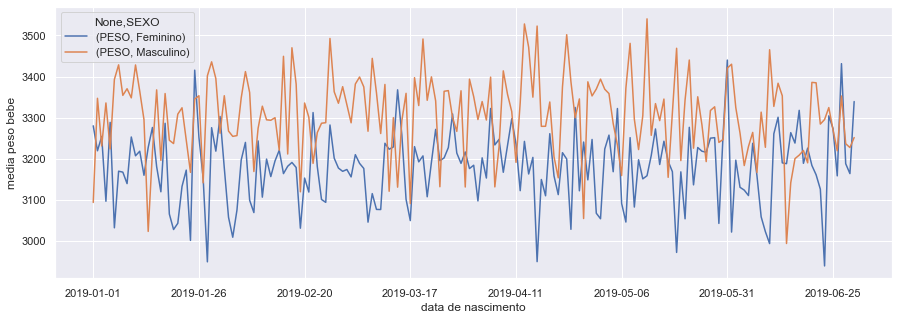

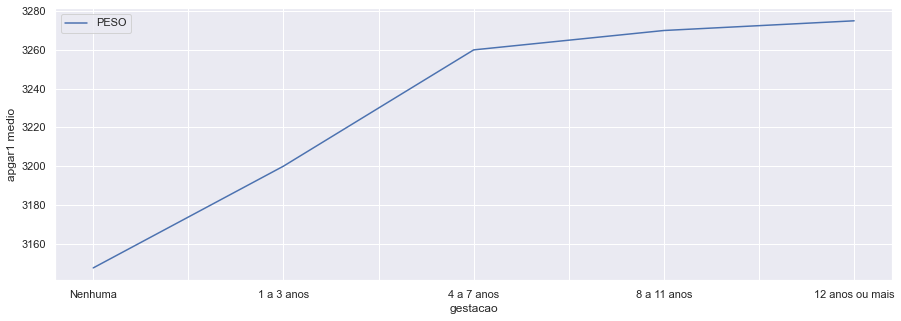

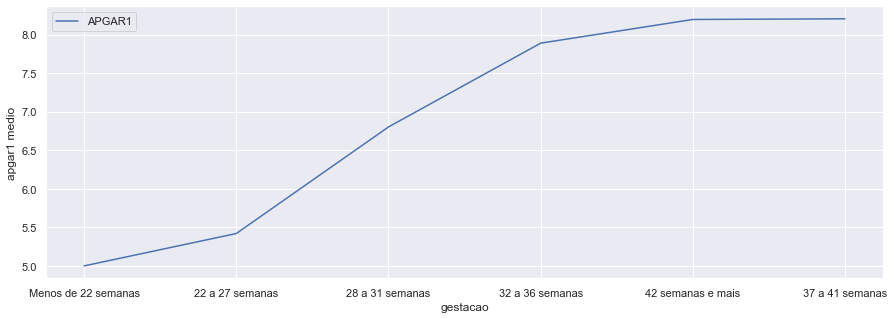

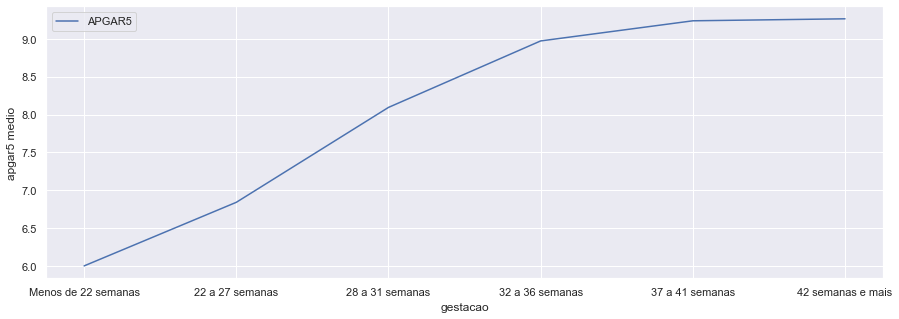

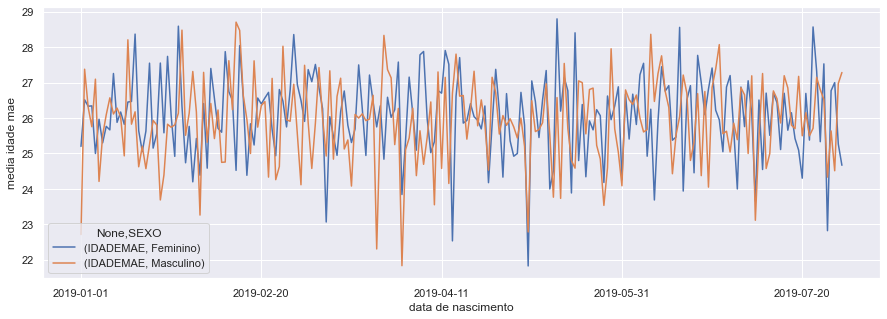

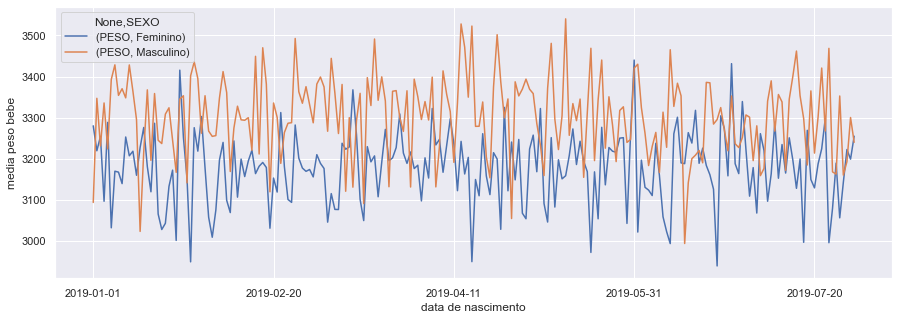

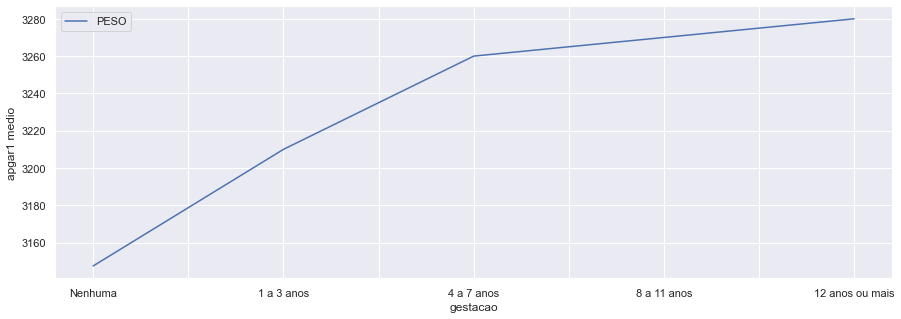

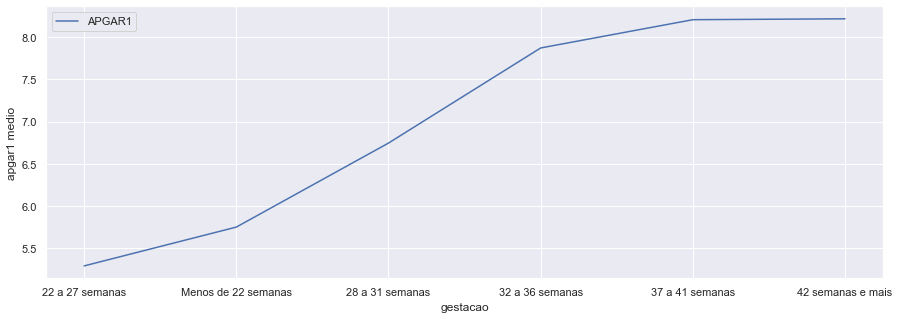

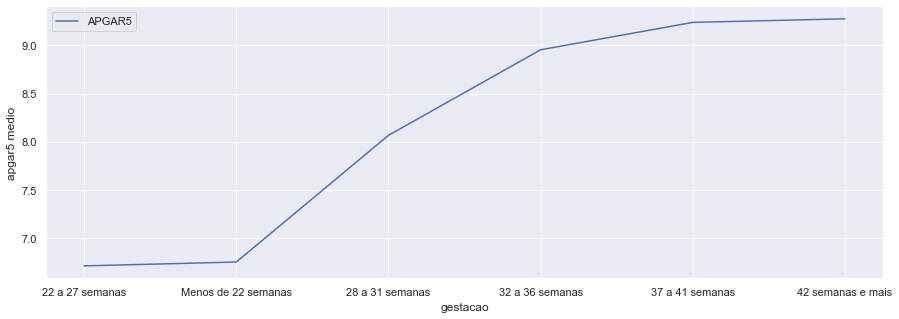

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sns.set()


def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None


#mes = sys.argv[1] ## usar para criar lista mes no cmd
mes = ['MAR', 'ABR', 'MAI', 'JUN', 'JUL']


for i in range(0, len(mes)):
    sinasc = pd.read_csv('./input/SINASC_RO_2019_'+mes[i]+'.csv')

    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)

    os.makedirs('./output/figs_cmd/'+max_data, exist_ok=True)

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig('./output/figs_cmd/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig('./output/figs_cmd/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs_cmd/'+max_data+'/media apgar1 por escolaridade mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs_cmd/'+max_data+'/media apgar1 por gestacao.png')

    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
    plt.savefig('./output/figs_cmd/'+max_data+'/media apgar5 por gestacao.png')